In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
reviews = pd.read_csv('final_dataset.csv')
reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",YByDh56Hl11HoYdBm-uArA,9hhRs_n85m-jsKOXp3jt7Q,1.0,0.0,0.0,0.0,Went there at 4am and there was only one waitr...,2016-05-08 08:49:25
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",3vwdkRRoUe4PewzD8HvQbQ,-BX5x3Ys-2JzFba3LiWlHA,1.0,0.0,0.0,0.0,I had an immensely frustrating experience here...,2017-08-30 10:52:52
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",LX2or1ZvpaO8x9Xb8UxF5Q,tftplxTcJYHU8nrwCwtzFg,2.0,1.0,0.0,0.0,"Food was decent, staff were accommodating. Res...",2015-03-21 14:00:29
3,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",LWQJo1dFvAgJQF_dxN6JCA,G_eZLhf1Kw5WBpMlXHizNQ,4.0,0.0,0.0,0.0,The staff here was great. We had a bunch of pe...,2014-03-16 13:59:31
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",yQJXhZIF6_VMC5gY7gBDAw,iYpCMhEqsped1647fF_u-A,1.0,0.0,0.0,0.0,Food was awful! Hamburger was burnt and cold....,2018-08-12 15:32:47


In [3]:
reviews['stars_y'].isna().sum()

2

In [4]:
reviews = reviews.dropna(subset=['stars_y'])

In [5]:
reviews.shape

(1142192, 22)

In [6]:
reviews['word_count'] = reviews['text'].apply(lambda x: len(str(x).split()))

In [7]:
reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,word_count
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",YByDh56Hl11HoYdBm-uArA,9hhRs_n85m-jsKOXp3jt7Q,1.0,0.0,0.0,0.0,Went there at 4am and there was only one waitr...,2016-05-08 08:49:25,87
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",3vwdkRRoUe4PewzD8HvQbQ,-BX5x3Ys-2JzFba3LiWlHA,1.0,0.0,0.0,0.0,I had an immensely frustrating experience here...,2017-08-30 10:52:52,186
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",LX2or1ZvpaO8x9Xb8UxF5Q,tftplxTcJYHU8nrwCwtzFg,2.0,1.0,0.0,0.0,"Food was decent, staff were accommodating. Res...",2015-03-21 14:00:29,23
3,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",LWQJo1dFvAgJQF_dxN6JCA,G_eZLhf1Kw5WBpMlXHizNQ,4.0,0.0,0.0,0.0,The staff here was great. We had a bunch of pe...,2014-03-16 13:59:31,41
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28.0,...,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",yQJXhZIF6_VMC5gY7gBDAw,iYpCMhEqsped1647fF_u-A,1.0,0.0,0.0,0.0,Food was awful! Hamburger was burnt and cold....,2018-08-12 15:32:47,39


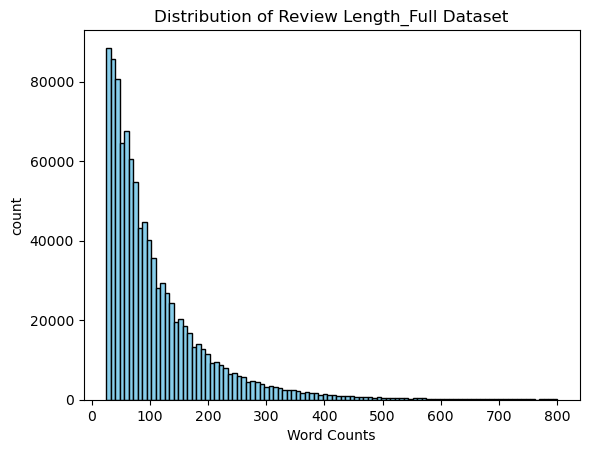

In [30]:
plt.hist(reviews['word_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length_Full Dataset')
plt.xlabel('Word Counts')
plt.ylabel('count')
plt.show()

In [9]:
percentile_10 = reviews['word_count'].quantile(0.1)
percentile_10

25.0

In [10]:
reviews = reviews[reviews['word_count'] >= percentile_10]
reviews.shape

(1030795, 23)

In [11]:
reviews = reviews[reviews['word_count'] <= 800]
reviews.shape

(1029688, 23)

In [12]:
reviews.to_csv('all_reviews_cleaned.csv', index=False)

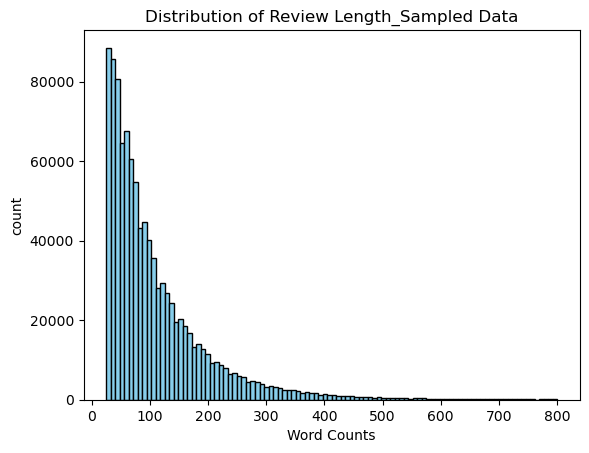

In [28]:
plt.hist(reviews['word_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length_Sampled Data')
plt.xlabel('Word Counts')
plt.ylabel('count')
plt.show()

In [14]:
skewness_all = skew(reviews['stars_y'])
skewness_all

-0.6947535979815251

In [15]:
star_counts_all = reviews['stars_y'].value_counts()

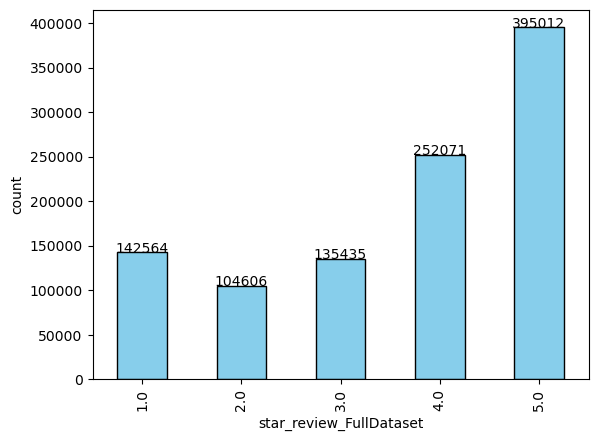

In [32]:
ax = star_counts_all.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xlabel('star_review_FullDataset')
ax.set_ylabel('count')
for i, v in enumerate(star_counts_all.sort_index()):
    ax.text(i, v + 0.1, str(v), color='black', ha='center')

plt.show()

In [17]:
sample5000 = reviews.sample(n=5000, random_state=42)

In [18]:
sample5000.to_csv('sampled_data_5000.csv', index=False)

In [19]:
skewness_sample = skew(sample5000['stars_y'])
skewness_sample

-0.6828844694987981

In [20]:
star_counts_sample = sample5000['stars_y'].value_counts()

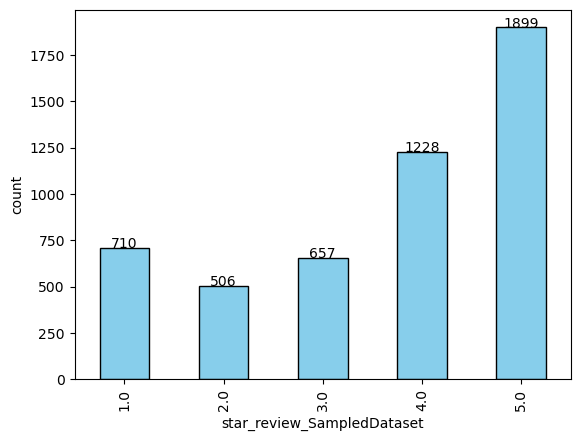

In [33]:
ax = star_counts_sample.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xlabel('star_review_SampledDataset')
ax.set_ylabel('count')
for i, v in enumerate(star_counts_sample.sort_index()):
    ax.text(i, v + 0.1, str(v), color='black', ha='center')

plt.show()

In [22]:
# Use the merge function with how='left' and indicator=True
merged = pd.merge(reviews,sample5000 , how='left', indicator=True)

# Filter the rows where the indicator is 'left_only' (present in dataset1 but not in dataset2)
result = merged[merged['_merge'] == 'left_only']

# Drop the indicator column if needed
result = result.drop(columns=['_merge'])

# Display the result
result.shape

(1024688, 23)

In [23]:
result.to_csv('unlabelled.csv', index=False)

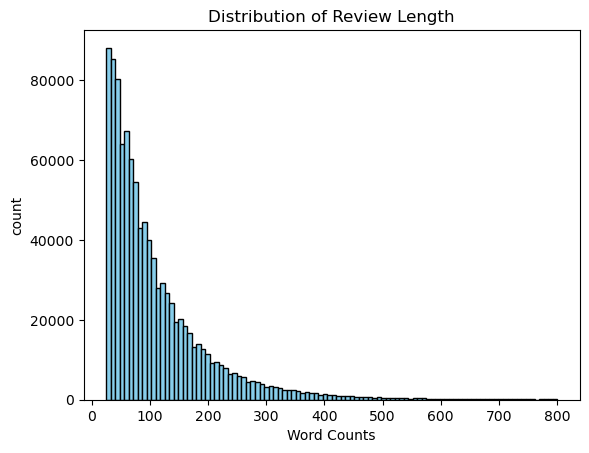

In [26]:
plt.hist(result['word_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length')
plt.xlabel('Word Counts')
plt.ylabel('count')
plt.show()

In [34]:
labelled_zeros = pd.read_csv('labelled_with_zeros.csv')
labelled_zeros.head()

,Unnamed: 0,Review,Review_Rating,Service,Food Quality,Ambiance/Atmosphere,Wait Time,Price,Menu Variety
0,0,The New Mexican a style cuisine here is damn g...,5.0,4.0,5.0,0.0,0.0,0.0,4.0
1,1,The Eastern European food is great but do not ...,5.0,0.0,5.0,0.0,5.0,0.0,5.0
2,2,Great service and great scene. Two levels with...,5.0,5.0,0.0,5.0,5.0,0.0,0.0
3,3,Had dinner here with my co-workers and this pl...,5.0,5.0,5.0,5.0,0.0,0.0,5.0
4,4,We have dined at Scoogi's many times and have ...,4.0,3.0,5.0,0.0,0.0,0.0,5.0


In [44]:
rating_service = labelled_zeros['Service'].value_counts()
rating_service

Service
0.0    1693
5.0    1508
1.0     600
4.0     553
3.0     327
2.0     319
Name: count, dtype: int64

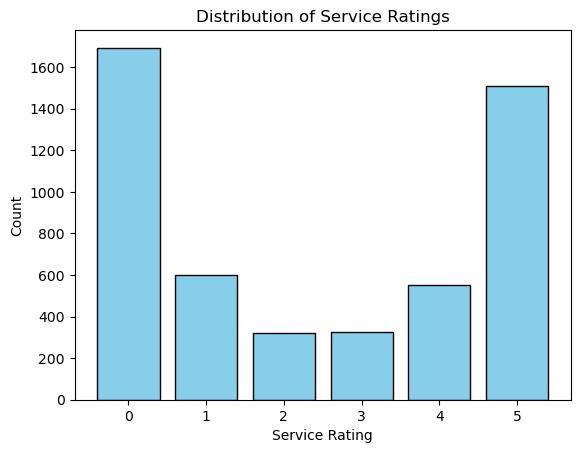

In [49]:
# Plotting the bar chart
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Service Rating')
plt.ylabel('Count')
plt.title('Distribution of Service Ratings')
plt.show()

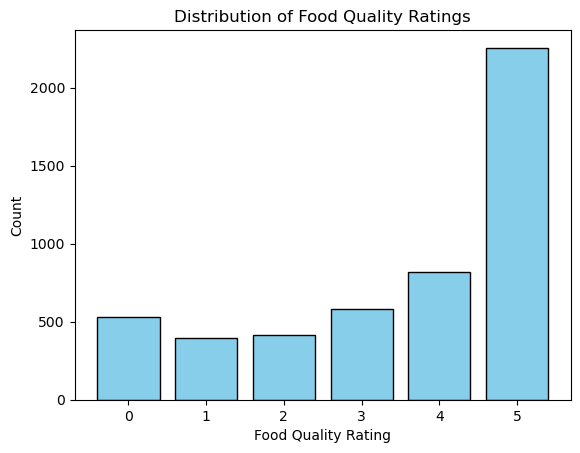

In [51]:
rating_service = labelled_zeros['Food Quality'].value_counts()
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Food Quality Rating')
plt.ylabel('Count')
plt.title('Distribution of Food Quality Ratings')
plt.show()

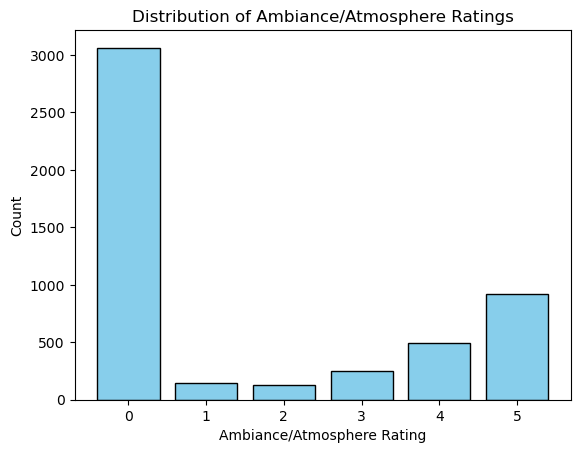

In [52]:
rating_service = labelled_zeros['Ambiance/Atmosphere'].value_counts()
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Ambiance/Atmosphere Rating')
plt.ylabel('Count')
plt.title('Distribution of Ambiance/Atmosphere Ratings')
plt.show()

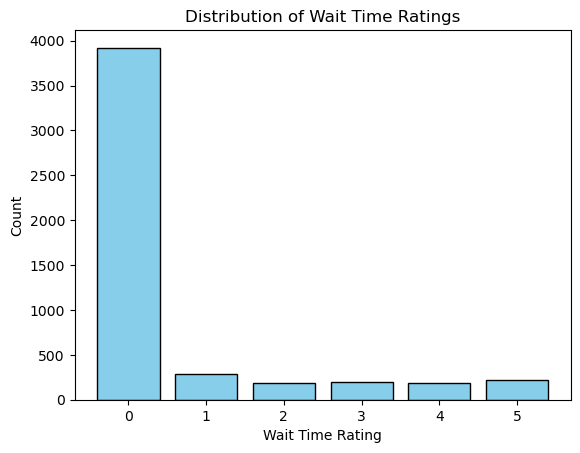

In [53]:
rating_service = labelled_zeros['Wait Time'].value_counts()
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Wait Time Rating')
plt.ylabel('Count')
plt.title('Distribution of Wait Time Ratings')
plt.show()

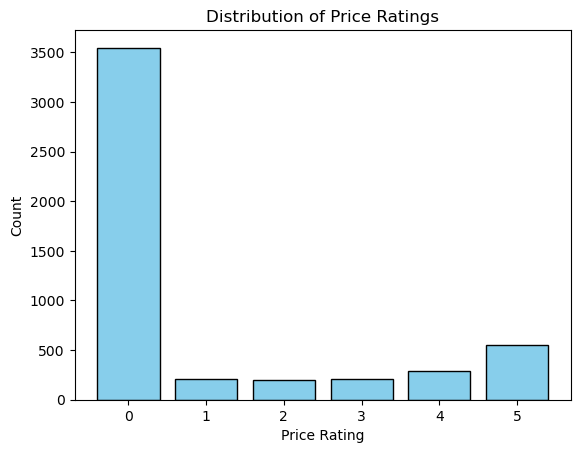

In [54]:
rating_service = labelled_zeros['Price'].value_counts()
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Price Rating')
plt.ylabel('Count')
plt.title('Distribution of Price Ratings')
plt.show()

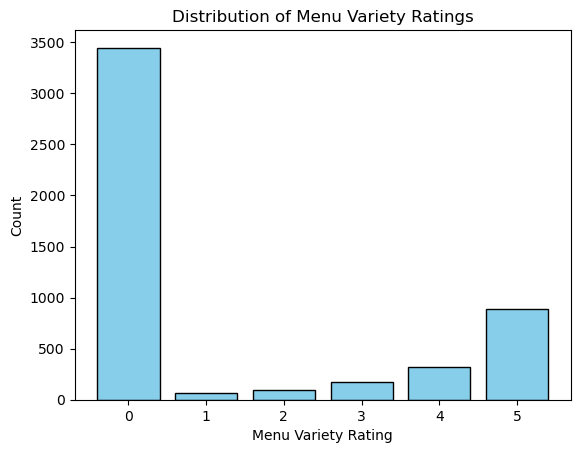

In [55]:
rating_service = labelled_zeros['Menu Variety'].value_counts()
plt.bar(rating_service.index, rating_service.values, color='skyblue', edgecolor='black')
plt.xlabel('Menu Variety Rating')
plt.ylabel('Count')
plt.title('Distribution of Menu Variety Ratings')
plt.show()